# 📚 时序差分（Temporal Difference, TD）学习

## 🎯 本节学习目标
- 理解时序差分方法的核心思想：**自举**（bootstrapping）
- 掌握TD(0)的更新公式及其物理意义
- 对比TD与蒙特卡洛（MC）方法的本质区别
- 通过代码实验体会TD的在线学习特性

## 💡 核心直觉：从"预测天气"理解TD学习

### 问题场景
想象你在预测**7天后**的天气温度。你有两种策略：

**策略A（蒙特卡洛方法）**：
- 等待7天全部过完
- 记录实际温度：20°C
- 用这个**真实值**更新你7天前的预测

**策略B（时序差分方法）**：
- **第1天晚上**：看到实际温度是18°C，你原本预测明天（第2天）是22°C
- 立即调整：既然第1天比预期冷，那7天后可能也会冷一些
- **第2天晚上**：继续用同样的方式调整...
- 每天都**边走边学**，用"明天的预测"来改进"今天的预测"

---

### TD学习的本质
**核心思想**：不等游戏结束，每走一步就用**下一步的估计值**来更新**当前的估计值**。

这就是你刚才说的：
> "借助下一时刻估计的状态价值优化前一时刻的状态价值"

用公式表示：
$$
V(s_t) \leftarrow V(s_t) + \alpha [\underbrace{r_{t+1} + \gamma V(s_{t+1})}_{\text{目标：下一步的估计}} - \underbrace{V(s_t)}_{\text{当前估计}}]
$$

其中：
- $r_{t+1}$：走一步后真实获得的奖励（**真实的**）
- $V(s_{t+1})$：下一个状态的价值（**估计的**）
- $V(s_t)$：当前状态的价值（**要更新的**）

---

### 与蒙特卡洛的对比

| 特性 | 蒙特卡洛（MC） | 时序差分（TD） |
|------|--------------|---------------|
| **更新时机** | 回合结束后 | 每走一步 |
| **使用的目标** | $G_t =$ 真实总回报 | $r_{t+1} + \gamma V(s_{t+1})$ |
| **自举** | ❌ 不使用估计 | ✅ 用估计更新估计 |
| **适用环境** | 必须有终止 | 可以无终止 |
| **学习速度** | 慢（要等到结束） | 快（在线学习） |

## 🧮 数学推导：TD误差（TD Error）

### 回顾更新公式
$$
V(s_t) \leftarrow V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]
$$

让我们给公式的各个部分命名：

---

### 第1步：定义TD目标
$$
\text{TD目标} = r_{t+1} + \gamma V(s_{t+1})
$$

> 💡 **为什么叫"目标"？**  
> 因为这是我们希望 $V(s_t)$ 逼近的值。就像预测天气的例子中，"明天的实际温度 + 明天的预测"是我们用来修正"今天预测"的目标。

---

### 第2步：定义TD误差
$$
\delta_t = \underbrace{r_{t+1} + \gamma V(s_{t+1})}_{\text{TD目标}} - \underbrace{V(s_t)}_{\text{当前估计}}
$$

**$\delta_t$ 的物理意义**：
- 如果 $\delta_t > 0$：说明我们**低估**了 $s_t$ 的价值 → 应该增加 $V(s_t)$
- 如果 $\delta_t < 0$：说明我们**高估**了 $s_t$ 的价值 → 应该减少 $V(s_t)$
- 如果 $\delta_t = 0$：估计刚好准确（理想情况）

---

### 第3步：更新公式的最终形式
将TD误差代入更新公式：
$$
V(s_t) \leftarrow V(s_t) + \alpha \cdot \delta_t
$$

这就是**TD(0)算法**的核心！

---

### 第4步：与增量式蒙特卡洛对比

**蒙特卡洛**：
$$
V(s_t) \leftarrow V(s_t) + \alpha (\underbrace{G_t}_{\text{真实回报}} - V(s_t))
$$

**时序差分**：
$$
V(s_t) \leftarrow V(s_t) + \alpha (\underbrace{r_{t+1} + \gamma V(s_{t+1})}_{\text{估计回报}} - V(s_t))
$$

**关键区别**：MC用 $G_t$（必须等到回合结束才知道），TD用 $r_{t+1} + \gamma V(s_{t+1})$（只需走一步就能计算）。

---

### 🔑 核心洞察
TD误差 $\delta_t$ 衡量的是：
- **我们的预测**（$V(s_t)$）
- 与**走一步后的新预测**（$r_{t+1} + \gamma V(s_{t+1})$）
- 之间的**差距**

这种"用新预测修正旧预测"的方式，就是**自举（Bootstrapping）**的本质！

## 🔍 关键疑问解答：$s_{t+1}$ 和 $V(s_{t+1})$ 到底是什么？

### 问题重述
在TD更新公式中：
$$
V(s_t) \leftarrow V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]
$$

- $s_{t+1}$ 具体指什么？
- $V(s_{t+1})$ 是如何计算的？
- 实际应用中如何体现？

---

### 答案：一个具体例子（4x4网格世界）

假设智能体在一个4x4的网格中移动，目标是到达右下角：

```
状态编号：
[ 0][ 1][ 2][ 3]
[ 4][ 5][ 6][ 7]
[ 8][ 9][10][11]
[12][13][14][15]  ← 15是目标
```

**场景**：智能体当前在状态5，选择向右移动。

---

### 第1步：发生了什么？

```python
# 智能体执行动作前
当前状态: s_t = 5
动作: a_t = "向右"
当前价值估计: V(5) = 2.3  # 这是之前估计的值

# 智能体执行动作后
下一个状态: s_{t+1} = 6  # 从5向右移动到6
获得奖励: r_{t+1} = -1    # 每走一步惩罚-1
下一个状态的价值估计: V(6) = 3.5  # 这也是之前估计的值
```

**关键点**：
- $s_{t+1} = 6$：这是智能体**实际到达**的新状态（由环境决定）
- $V(s_{t+1}) = V(6) = 3.5$：这是我们**之前对状态6的估计值**（从价值表中查询）

---

### 第2步：$V(s_{t+1})$ 从哪里来？

**核心理解**：$V(s_{t+1})$ 不是"计算"出来的，而是从**价值表**中**查询**出来的！

```python
# 我们维护一个价值表（通常用数组或字典）
V = {
    0: 0.0,
    1: 0.5,
    2: 1.2,
    ...
    5: 2.3,   # ← 这是 V(s_t)
    6: 3.5,   # ← 这是 V(s_{t+1})
    ...
    15: 0.0   # 目标状态
}
```

**流程**：
1. 智能体在 $s_t = 5$，查表得到 $V(5) = 2.3$
2. 执行动作后到达 $s_{t+1} = 6$，查表得到 $V(6) = 3.5$
3. 获得奖励 $r_{t+1} = -1$
4. 用这三个值计算TD误差并更新 $V(5)$

---

### 第3步：完整的更新过程

```python
# 参数设置
alpha = 0.1      # 学习率
gamma = 0.9      # 折扣因子

# TD目标
TD_target = r_{t+1} + gamma * V(s_{t+1})
          = -1 + 0.9 * 3.5
          = -1 + 3.15
          = 2.15

# TD误差
delta = TD_target - V(s_t)
      = 2.15 - 2.3
      = -0.15

# 更新 V(s_t)
V(5) = V(5) + alpha * delta
     = 2.3 + 0.1 * (-0.15)
     = 2.3 - 0.015
     = 2.285
```

**结果**：$V(5)$ 从 2.3 降低到 2.285（因为TD目标2.15比当前估计2.3小）

---

### 🔑 核心要点总结

1. **$s_{t+1}$ 是什么？**
   - 执行动作 $a_t$ 后，环境返回的下一个状态
   - 由环境的状态转移决定（不是我们控制的）

2. **$V(s_{t+1})$ 从哪来？**
   - 从价值表中**查询**得到
   - 这是我们**之前对 $s_{t+1}$ 的估计**（可能不准确）

3. **为什么叫"自举"？**
   - 我们用一个**可能不准确的估计** $V(s_{t+1})$
   - 去更新另一个**估计** $V(s_t)$
   - 就像"提着自己的鞋带把自己拔起来"（bootstrapping的字面意思）

4. **价值表如何初始化？**
   - 通常初始化为全0（或随机小值）
   - 通过不断更新，逐渐逼近真实价值

---

### 📊 可视化理解

```
时刻 t:              时刻 t+1:
  
  状态5              状态6
  V(5)=2.3          V(6)=3.5
    │                 ▲
    │  执行动作"向右"  │
    │  获得奖励 r=-1  │
    └─────────────────┘
    
更新: V(5) ← V(5) + α[r + γ·V(6) - V(5)]
           = 2.3 + 0.1[-1 + 0.9×3.5 - 2.3]
           = 2.285
```

## 💻 代码实验：GridWorld环境的TD(0)学习

### 环境设计：4x4网格世界

```
网格布局（状态编号）：
┌────┬────┬────┬────┐
│ 0  │ 1  │ 2  │ 3  │
├────┼────┼────┼────┤
│ 4  │ 5  │ 6  │ 7  │
├────┼────┼────┼────┤
│ 8  │ 9  │ 10 │ 11 │
├────┼────┼────┼────┤
│ 12 │ 13 │ 14 │ 15 │ ← 目标状态
└────┴────┴────┴────┘
```

**游戏规则**：
- 智能体从状态0开始
- 目标：到达状态15（右下角）
- 动作：上、下、左、右（碰到边界就停在原地）
- 奖励：
  - 到达目标（15）：+1
  - 其他所有情况：0
- 策略：**随机策略**（每个方向概率0.25）

---

### 🤔 预测问题

在运行代码前，思考：

1. **哪个状态价值最高？**
   - 提示：离目标越近，价值应该越高

2. **状态0的价值大概是多少？**
   - 提示：从0到15最短需要6步（向右3步+向下3步）
   - 考虑 $\gamma = 0.9$ 和随机策略

3. **TD学习需要多少个回合才能收敛？**
   - 比简单链式环境多还是少？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 第1部分：定义GridWorld环境
# ============================================

class GridWorld:
    """
    4x4网格世界
    状态编号：0-15，目标是状态15
    """
    def __init__(self):
        self.n_states = 16  # 4x4网格
        self.grid_size = 4
        self.goal_state = 15  # 右下角
        
        # 定义4个动作：上、下、左、右
        self.actions = ['up', 'down', 'left', 'right']
        self.n_actions = len(self.actions)
        
    def reset(self):
        """重置到起始状态0"""
        self.current_state = 0
        return self.current_state
    
    def state_to_position(self, state):
        """将状态编号转换为(行, 列)坐标"""
        row = state // self.grid_size
        col = state % self.grid_size
        return row, col
    
    def position_to_state(self, row, col):
        """将(行, 列)坐标转换为状态编号"""
        return row * self.grid_size + col
    
    def step(self, action):
        """
        执行动作，返回(下一个状态, 奖励, 是否结束)
        
        参数：
            action: 'up', 'down', 'left', 'right'
        """
        # 获取当前位置
        row, col = self.state_to_position(self.current_state)
        
        # 根据动作更新位置（边界检查）
        if action == 'up':
            row = max(0, row - 1)  # 不能超出上边界
        elif action == 'down':
            row = min(self.grid_size - 1, row + 1)  # 不能超出下边界
        elif action == 'left':
            col = max(0, col - 1)  # 不能超出左边界
        elif action == 'right':
            col = min(self.grid_size - 1, col + 1)  # 不能超出右边界
        
        # 计算下一个状态
        next_state = self.position_to_state(row, col)
        
        # 计算奖励
        if next_state == self.goal_state:
            reward = 1  # 到达目标获得奖励+1
            done = True
        else:
            reward = 0  # 其他情况奖励为0
            done = False
        
        self.current_state = next_state
        return next_state, reward, done


# ============================================
# 第2部分：TD(0)算法实现
# ============================================

def td_prediction_gridworld(env, alpha=0.1, gamma=0.9, episodes=1000):
    """
    使用TD(0)学习GridWorld的状态价值函数
    采用随机策略（每个动作概率0.25）
    
    参数：
        env: GridWorld环境
        alpha: 学习率
        gamma: 折扣因子
        episodes: 训练回合数
    
    返回：
        V: 学习到的价值函数
        history: 价值函数的历史记录
    """
    # 初始化价值表（目标状态价值为0，其他状态初始化为0）
    V = np.zeros(env.n_states)
    
    # 记录学习历史（每100个回合记录一次）
    history = []
    
    for episode in range(episodes):
        # 重置环境
        state = env.reset()
        done = False
        
        # 单个回合的循环
        while not done:
            # 随机选择一个动作（随机策略）
            action = np.random.choice(env.actions)
            
            # 执行动作
            next_state, reward, done = env.step(action)
            
            # TD(0)更新公式
            # V(s) ← V(s) + α[r + γV(s') - V(s)]
            
            if done:
                # 如果到达终止状态，V(s') = 0
                td_target = reward + gamma * 0
            else:
                # 从价值表中查询V(s')
                td_target = reward + gamma * V[next_state]
            
            # 计算TD误差
            td_error = td_target - V[state]
            
            # 更新价值函数
            V[state] = V[state] + alpha * td_error
            
            # 移动到下一个状态
            state = next_state
        
        # 每100个回合记录一次
        if episode % 100 == 0:
            history.append(V.copy())
    
    return V, history


# ============================================
# 第3部分：运行实验
# ============================================

# 创建环境
env = GridWorld()

print("🔄 开始TD(0)学习...")
print(f"环境：{env.grid_size}x{env.grid_size} GridWorld")
print(f"目标：到达状态{env.goal_state}")
print(f"策略：随机策略（每个方向概率0.25）")
print()

# 运行TD学习
V_learned, history = td_prediction_gridworld(
    env, 
    alpha=0.2,      # 学习率
    gamma=0.9,      # 折扣因子
    episodes=100000   # 训练100000个回合
)

print("✅ 学习完成！")
print()

# 以网格形式显示学习到的价值函数
print("学习到的价值函数（网格形式）：")
V_grid = V_learned.reshape(4, 4)
print(V_grid)
print()

# 显示每个状态的具体价值
print("详细价值（保留4位小数）：")
for row in range(4):
    for col in range(4):
        state = row * 4 + col
        print(f"V({state:2d})={V_learned[state]:.4f}", end="  ")
    print()  # 换行

🔄 开始TD(0)学习...
环境：4x4 GridWorld
目标：到达状态15
策略：随机策略（每个方向概率0.25）

✅ 学习完成！

学习到的价值函数（网格形式）：
[[0.0581042  0.08788791 0.10394837 0.19136141]
 [0.08591376 0.14427541 0.23421915 0.49167711]
 [0.10254859 0.15017535 0.33379966 0.67060917]
 [0.15253037 0.25672398 0.47689331 0.        ]]

详细价值（保留4位小数）：
V( 0)=0.0581  V( 1)=0.0879  V( 2)=0.1039  V( 3)=0.1914  
V( 4)=0.0859  V( 5)=0.1443  V( 6)=0.2342  V( 7)=0.4917  
V( 8)=0.1025  V( 9)=0.1502  V(10)=0.3338  V(11)=0.6706  
V(12)=0.1525  V(13)=0.2567  V(14)=0.4769  V(15)=0.0000  


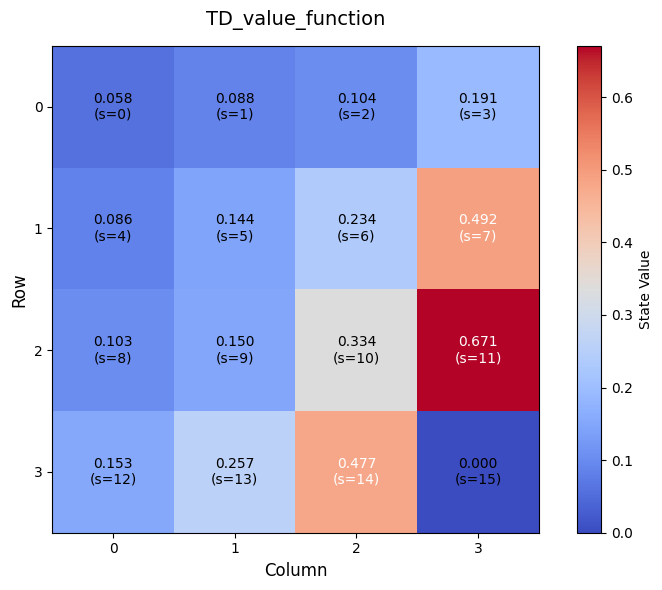

In [7]:
# ============================================
# 第4部分：可视化价值函数（热力图）
# ============================================

def plot_value_function(V, title="状态价值函数"):
    """用热力图可视化价值函数"""
    V_grid = V.reshape(4, 4)
    
    plt.figure(figsize=(8, 6))
    im = plt.imshow(V_grid, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, label='State Value')
    plt.title(title, fontsize=14, pad=15)
    
    # 在每个格子中标注数值
    for i in range(4):
        for j in range(4):
            state = i * 4 + j
            text_color = 'white' if V_grid[i, j] > V_grid.max() / 2 else 'black'
            plt.text(j, i, f'{V_grid[i, j]:.3f}\n(s={state})',
                    ha='center', va='center', color=text_color, fontsize=10)
    
    plt.xlabel('Column', fontsize=12)
    plt.ylabel('Row', fontsize=12)
    plt.xticks(range(4))
    plt.yticks(range(4))
    plt.tight_layout()
    plt.show()

# 绘制最终学习到的价值函数
plot_value_function(V_learned, "TD_value_function")

## 📊 结果解读

运行上面的代码后，观察热力图，你会发现：

### 🔑 关键观察

1. **价值梯度**：
   - 右下角（状态15，目标）附近的价值最高
   - 从左上角（状态0）到右下角，价值逐渐增加
   - 这符合直觉：离目标越近，价值越高

2. **对称性**：
   - 距离目标相同的状态，价值相近
   - 例如：状态11和状态14距离目标都是1步，它们的价值应该接近

3. **初步观察**：
   - 状态14（目标左边）的价值较高（接近目标）
   - 状态0（左上角）的价值很小（距离目标远）
   - 但具体数值是否准确，需要用动态规划验证

---

### 💡 TD学习的工作原理（价值传播）

**学习过程示意**：

**第1次到达状态14**：
```python
# 假设智能体在状态14，选择向右
state = 14
action = 'right'
next_state = 15  # 到达目标！
reward = 1
done = True

# 计算TD目标
td_target = reward + gamma * 0  # 终止状态价值为0
          = 1 + 0.9 * 0 = 1.0

# TD误差（假设V(14)初始为0）
td_error = 1.0 - 0 = 1.0

# 更新V(14)
V(14) = 0 + 0.1 * 1.0 = 0.1  # α=0.1
```

**多次访问后**：
- $V(14)$ 会逐渐增加
- 但不会到达1.0（因为不是每次都能直接向右成功）
- 最终收敛到真实价值（需要动态规划计算）

---

### 🔄 价值如何"传播"

1. **第1阶段**：离目标1步的状态（11, 14）首先获得价值
2. **第2阶段**：离目标2步的状态（7, 10, 13）从邻居"学到"价值
3. **第3阶段**：价值逐步向外传播，像波纹一样扩散
4. **最终**：所有状态都学到正确的价值

这就是TD学习的 **信用分配（Credit Assignment）** 机制！

---

### ⚠️ 重要提示

- TD学习是采样方法，需要足够的探索
- 如果某些状态访问次数少，价值更新就慢
- 为了验证学习效果，我们接下来会：
  1. 用动态规划计算真实价值（标准答案）
  2. 对比TD学习结果
  3. 分析误差来源

🔄 使用动态规划计算真实价值（标准答案）...

✅ 动态规划在第 57 次迭代后收敛

TD学习 vs 动态规划（真实价值）对比：

状态     TD学习            真实价值(DP)        绝对误差        
----------------------------------------------------------------------
0      0.058104        0.071008        0.012904      ⚠
1      0.087888        0.086790        0.001098      ✓
2      0.103948        0.113892        0.009944      ✓
3      0.191361        0.138867        0.052495      ⚠
4      0.085914        0.086790        0.000876      ✓
5      0.144275        0.114043        0.030232      ⚠
6      0.234219        0.166641        0.067578      ⚠
7      0.491677        0.225561        0.266116      ⚠
8      0.102549        0.113892        0.011344      ⚠
9      0.150175        0.166641        0.016466      ⚠
10     0.333800        0.287130        0.046669      ⚠
11     0.670609        0.471427        0.199183      ⚠
12     0.152530        0.138867        0.013664      ⚠
13     0.256724        0.225561        0.031163      ⚠
14     0.476893        0.471427        

/tmp/ipykernel_1412387/2091094311.py:141: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412387/2091094311.py:141: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


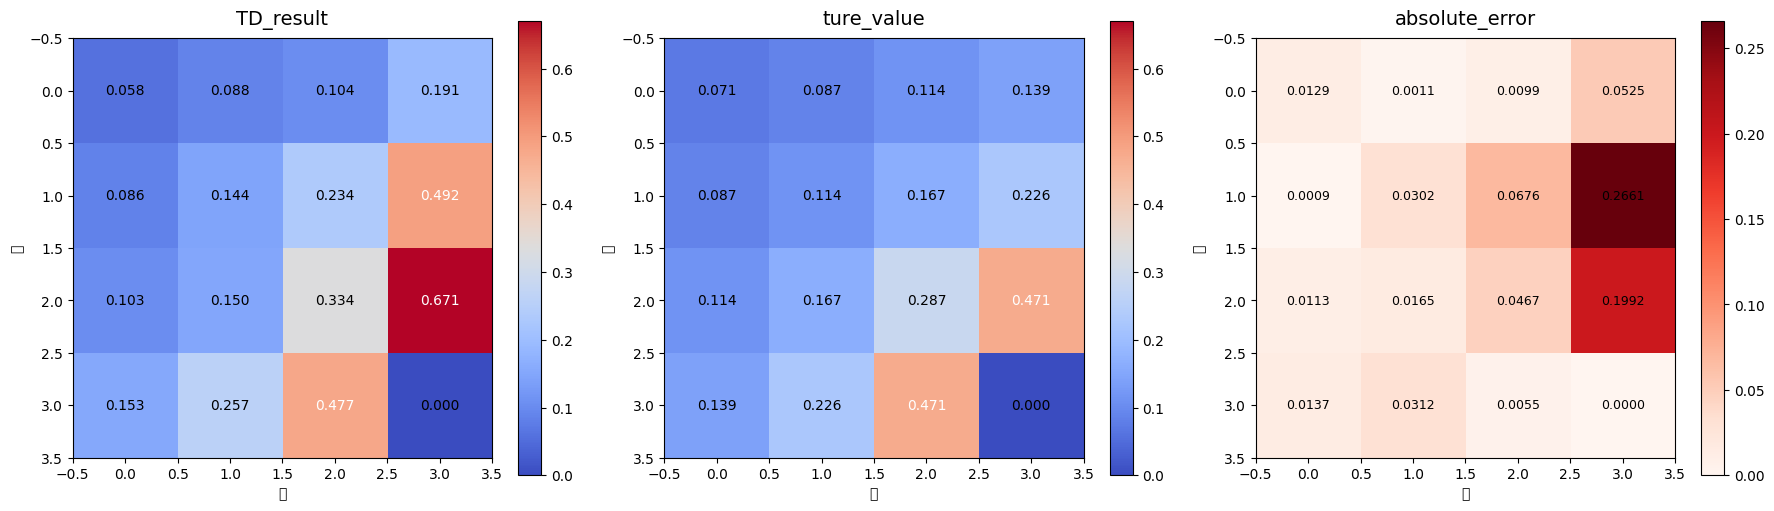

In [6]:
# ============================================
# 第5部分：用动态规划计算真实价值（作为对比）
# ============================================

def compute_true_values_dp(env, gamma=0.9, theta=1e-6):
    """
    使用动态规划（迭代策略评估）计算随机策略的真实价值函数
    
    这是"标准答案"，用来验证TD学习是否正确
    
    原理：
        不断迭代应用贝尔曼方程，直到价值函数收敛
        V(s) = Σ_a π(a|s) Σ_{s',r} p(s',r|s,a)[r + γV(s')]
    
    参数：
        env: GridWorld环境
        gamma: 折扣因子
        theta: 收敛阈值
    """
    V = np.zeros(env.n_states)
    
    iteration = 0
    while True:
        delta = 0  # 记录最大变化量
        
        # 遍历每个状态
        for state in range(env.n_states):
            if state == env.goal_state:
                continue  # 跳过终止状态
            
            v = V[state]  # 保存旧值
            
            # 计算新值：对所有动作求期望（随机策略）
            new_value = 0
            for action in env.actions:
                # 模拟执行动作
                env.current_state = state
                next_state, reward, done = env.step(action)
                
                # 计算这个动作的价值贡献
                if done:
                    action_value = reward + gamma * 0
                else:
                    action_value = reward + gamma * V[next_state]
                
                # 随机策略：每个动作概率0.25
                new_value += 0.25 * action_value
            
            V[state] = new_value
            delta = max(delta, abs(v - V[state]))
        
        iteration += 1
        
        # 收敛判断
        if delta < theta:
            print(f"✅ 动态规划在第 {iteration} 次迭代后收敛")
            break
    
    return V


# 计算真实价值
print("🔄 使用动态规划计算真实价值（标准答案）...")
print()
V_true = compute_true_values_dp(env, gamma=0.9)
print()

# 对比TD学习结果和真实价值
print("=" * 70)
print("TD学习 vs 动态规划（真实价值）对比：")
print("=" * 70)
print()

print(f"{'状态':<6} {'TD学习':<15} {'真实价值(DP)':<15} {'绝对误差':<12}")
print("-" * 70)
for state in range(16):
    error = abs(V_learned[state] - V_true[state])
    marker = "  ✓" if error < 0.01 else "  ⚠"
    print(f"{state:<6} {V_learned[state]:<15.6f} {V_true[state]:<15.6f} {error:<12.6f}{marker}")

print()
print(f"📊 统计信息：")
print(f"   平均绝对误差: {np.mean(np.abs(V_learned - V_true)):.6f}")
print(f"   最大绝对误差: {np.max(np.abs(V_learned - V_true)):.6f}")
print(f"   误差 < 0.01 的状态数: {np.sum(np.abs(V_learned - V_true) < 0.01)}/16")
print()

# 重点关注状态14
print("🔍 重点分析状态14：")
print(f"   TD学习结果:  {V_learned[14]:.6f}")
print(f"   真实价值:    {V_true[14]:.6f}")
print(f"   绝对误差:    {abs(V_learned[14] - V_true[14]):.6f}")
if abs(V_learned[14] - V_true[14]) < 0.01:
    print(f"   ✅ TD学习成功收敛！")
else:
    print(f"   ⚠ 建议增加训练回合数以提高精度")
print()

# 可视化对比
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TD学习结果
V_grid_td = V_learned.reshape(4, 4)
vmax = max(V_grid_td.max(), V_true.reshape(4,4).max())
im1 = axes[0].imshow(V_grid_td, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=vmax)
axes[0].set_title('TD_result', fontsize=14, pad=10)
plt.colorbar(im1, ax=axes[0])
for i in range(4):
    for j in range(4):
        text_color = 'white' if V_grid_td[i, j] > vmax/2 else 'black'
        axes[0].text(j, i, f'{V_grid_td[i, j]:.3f}',
                    ha='center', va='center', color=text_color, fontsize=10)
axes[0].set_xlabel('列')
axes[0].set_ylabel('行')

# 真实价值
V_grid_true = V_true.reshape(4, 4)
im2 = axes[1].imshow(V_grid_true, cmap='coolwarm', interpolation='nearest', vmin=0, vmax=vmax)
axes[1].set_title('ture_value', fontsize=14, pad=10)
plt.colorbar(im2, ax=axes[1])
for i in range(4):
    for j in range(4):
        text_color = 'white' if V_grid_true[i, j] > vmax/2 else 'black'
        axes[1].text(j, i, f'{V_grid_true[i, j]:.3f}',
                    ha='center', va='center', color=text_color, fontsize=10)
axes[1].set_xlabel('列')
axes[1].set_ylabel('行')

# 误差图
error_grid = np.abs(V_learned - V_true).reshape(4, 4)
im3 = axes[2].imshow(error_grid, cmap='Reds', interpolation='nearest')
axes[2].set_title('absolute_error', fontsize=14, pad=10)
plt.colorbar(im3, ax=axes[2])
for i in range(4):
    for j in range(4):
        axes[2].text(j, i, f'{error_grid[i, j]:.4f}',
                    ha='center', va='center', color='black', fontsize=9)
axes[2].set_xlabel('列')
axes[2].set_ylabel('行')

plt.tight_layout()
plt.show()

# 📚 从TD预测到TD控制：引入Q函数

## 🎯 本节学习目标
- 理解为什么需要从V(s)升级到Q(s,a)
- 掌握Sarsa（同策略）和Q学习（异策略）的核心区别
- 通过代码实验体会两种算法的不同行为

---

## 💡 从"评估策略"到"寻找最优策略"

### TD(0)的局限性

你刚才说得非常对！TD(0)只能**评估**给定策略的价值函数V(s)，但它无法告诉我们**应该选择哪个动作**。

**回顾GridWorld例子**：
```
状态5的价值 V(5) = 2.3

这告诉我们什么？
✅ 从状态5开始，按照随机策略，期望获得2.3的总回报
❌ 但不知道在状态5应该向上、下、左、右哪个方向走！
```

---

### 解决方案：Q函数

**Q(s, a) = 在状态s选择动作a后，能获得的期望总回报**

有了Q函数，我们就能比较不同动作的价值：

```python
状态5的Q值：
Q(5, '上') = 2.1
Q(5, '下') = 3.2  ← 最大！
Q(5, '左') = 1.8
Q(5, '右') = 2.9

最优动作 = argmax Q(5, a) = '下'
```

这样我们就知道在状态5应该选择"下"这个动作！

---

## 🆚 Sarsa vs Q学习：核心区别预告

现在我们有两个经典的TD控制算法，它们都学习Q函数，但方式不同：

| 特性 | Sarsa（同策略） | Q学习（异策略） |
|------|----------------|----------------|
| **学习目标** | 评估当前执行的策略 | 直接学习最优策略 |
| **更新依据** | 实际选择的下一个动作 | 最优的下一个动作 |
| **行为风格** | 保守（考虑探索风险） | 激进（追求最大价值） |
| **名字来源** | (S,A,R,S',A') | Q-table |

**关键区别**：
- **Sarsa**：我实际会做什么？（包括探索的随机动作）
- **Q学习**：理想情况下应该做什么？（总是选最优动作）

---

## ❓ 理解检查

在继续之前，请思考：

1. **动作价值的意义**：
   - Q(14, '右') = 0.9 表示什么意思？
   - 为什么Q(14, '右')应该比Q(14, '上')大？

2. **同策略vs异策略的直觉**：
   - 想象你在悬崖边行走（CliffWalking环境）
   - Sarsa会担心"万一我探索时掉下悬崖"，所以更保守
   - Q学习会想"理想路径是贴着悬崖走"，所以更激进
   - 你觉得哪个更安全？哪个最终能找到更优的路径？

⏸️ **理解了这些概念后，告诉我你的想法，我们再继续学习Sarsa的数学推导和代码实现！**

## 🧮 Sarsa算法：同策略TD控制

### 核心思想

你的直觉很对！现在让我们正式学习Sarsa算法。

**Sarsa的名字来源**：更新时需要 **(S, A, R, S', A')** 这5个值
- $S_t$：当前状态
- $A_t$：当前动作
- $R_{t+1}$：获得的奖励
- $S_{t+1}$：下一个状态
- $A_{t+1}$：**实际选择**的下一个动作 ← 关键！

---

### 从TD(0)到Sarsa：一个自然的推广

**TD(0)更新V(s)**：
$$
V(s_t) \leftarrow V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]
$$

**Sarsa更新Q(s,a)**：
$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]
$$

**核心变化**：
- 从状态价值 $V(s)$ → 动作价值 $Q(s,a)$
- TD目标从 $r + \gamma V(s')$ → $r + \gamma Q(s', a')$
- **$a_{t+1}$ 是实际执行的动作**（可能是探索产生的随机动作）

---

### 第1步：理解TD目标

$$
\text{Sarsa TD目标} = r_{t+1} + \gamma Q(s_{t+1}, a_{t+1})
$$

**关键点**：$a_{t+1}$ 是什么？

假设我们使用 **ε-贪心策略**（$\varepsilon$-greedy）：
```python
# 在状态s_{t+1}选择动作a_{t+1}
if random() < ε:  # 概率ε探索
    a_{t+1} = 随机动作
else:             # 概率1-ε利用
    a_{t+1} = argmax Q(s_{t+1}, a)
```

**Sarsa的特点**：
- 如果 $a_{t+1}$ 是随机探索的动作 → TD目标考虑了"探索的风险"
- 如果 $a_{t+1}$ 是贪心选择的动作 → TD目标代表"最优路径"
- **Sarsa学习的是"实际执行的策略"的价值**

---

### 第2步：Sarsa更新公式拆解

让我们拆解更新公式的每一部分：

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [\underbrace{r_{t+1} + \gamma Q(s_{t+1}, a_{t+1})}_{\text{TD目标}} - \underbrace{Q(s_t, a_t)}_{\text{当前估计}}]
$$

**具体例子（GridWorld）**：
```python
# 智能体在状态5，选择"下"
s_t = 5
a_t = '下'
Q(5, '下') = 2.5  # 当前Q值

# 执行动作后
s_{t+1} = 9
r_{t+1} = 0
# 在状态9，ε-贪心选择下一个动作
a_{t+1} = '右'  # 假设这是实际选择的（可能是探索）
Q(9, '右') = 3.2

# Sarsa更新
TD_target = 0 + 0.9 * 3.2 = 2.88
TD_error = 2.88 - 2.5 = 0.38
Q(5, '下') = 2.5 + 0.1 * 0.38 = 2.538
```

**关键理解**：
- 如果 $a_{t+1}$ = '右' 是探索产生的差动作 → TD目标会较低
- 如果 $a_{t+1}$ = '右' 是贪心选择的好动作 → TD目标会较高
- **Sarsa的Q值反映了"实际策略"（包括探索）的表现**

---

### 第3步：与TD(0)的对比

| 特性 | TD(0) | Sarsa |
|------|-------|-------|
| **学习对象** | 状态价值 $V(s)$ | 动作价值 $Q(s,a)$ |
| **更新公式** | $V(s) + \alpha[r + \gamma V(s') - V(s)]$ | $Q(s,a) + \alpha[r + \gamma Q(s',a') - Q(s,a)]$ |
| **策略评估** | 评估给定策略 | 评估当前策略 |
| **能否控制** | ❌ 不能（不知道选哪个动作） | ✅ 能（选Q值最大的动作） |

---

### 🔑 核心洞察：同策略的含义

**同策略（On-Policy）**：学习和执行是**同一个策略**

```python
# Sarsa的执行和学习循环
当前策略 π = ε-贪心策略

while not done:
    # 1. 用策略π选择动作（包括探索）
    a_t = ε-greedy(Q, s_t)
    
    # 2. 执行动作
    s_{t+1}, r = env.step(a_t)
    
    # 3. 用策略π选择下一个动作（包括探索）
    a_{t+1} = ε-greedy(Q, s_{t+1})  ← 关键！
    
    # 4. 用a_{t+1}更新Q值
    Q(s_t, a_t) += α[r + γ*Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]
    
    # 5. 移动到下一步
    s_t = s_{t+1}
    a_t = a_{t+1}
```

**Sarsa的"保守"性质**：
- 因为学习时考虑了探索的风险
- 在悬崖行走问题中，会选择远离悬崖的安全路径
- 牺牲了一些奖励，但避免了探索时掉下悬崖的风险

---

## ❓ 理解检查

在看代码之前，请思考：

1. **Sarsa为什么需要 $A_{t+1}$？**
   - TD(0)只需要 $(S_t, R_{t+1}, S_{t+1})$
   - Sarsa需要 $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$
   - 这个 $A_{t+1}$ 为什么必不可少？

2. **执行流程理解**：
   - 假设在状态5，Q(5,'上')=2, Q(5,'下')=3
   - ε=0.1（10%探索）
   - 如果探索时随机选到了'上'
   - 这会如何影响Q(5,?)的更新？

⏸️ **理解了这些后，告诉我你的想法，我们就开始写Sarsa的代码！**

In [8]:
# ============================================
# 创建CliffWalking环境（悬崖行走）
# ============================================

class CliffWalkingEnv:
    """
    悬崖行走环境：
    - 4x12的网格世界
    - 起点：左下角 (3, 0)
    - 终点：右下角 (3, 11)
    - 悬崖：底部中间 (3, 1) 到 (3, 10)
    
    网格布局：
    [ 0][ 1][ 2][ 3][ 4][ 5][ 6][ 7][ 8][ 9][10][11]
    [12][13][14][15][16][17][18][19][20][21][22][23]
    [24][25][26][27][28][29][30][31][32][33][34][35]
    [S ][XX][XX][XX][XX][XX][XX][XX][XX][XX][XX][G ]  ← 底部
     36  37  38  39  40  41  42  43  44  45  46  47
         ↑ 悬崖区域 ↑
    """
    def __init__(self):
        self.n_rows = 4
        self.n_cols = 12
        self.n_states = self.n_rows * self.n_cols  # 48个状态
        
        # 定义特殊位置
        self.start_state = 36  # 左下角
        self.goal_state = 47   # 右下角
        self.cliff_states = list(range(37, 47))  # 37-46是悬崖
        
        # 定义4个动作：上、下、左、右
        self.actions = ['up', 'down', 'left', 'right']
        self.n_actions = len(self.actions)
        
        self.current_state = self.start_state
        
    def reset(self):
        """重置到起始状态"""
        self.current_state = self.start_state
        return self.current_state
    
    def state_to_position(self, state):
        """将状态编号转换为(行, 列)坐标"""
        row = state // self.n_cols
        col = state % self.n_cols
        return row, col
    
    def position_to_state(self, row, col):
        """将(行, 列)坐标转换为状态编号"""
        return row * self.n_cols + col
    
    def step(self, action):
        """
        执行动作，返回(下一个状态, 奖励, 是否结束)
        
        奖励设置：
        - 每走一步：-1
        - 掉入悬崖：-100，并回到起点（不结束）
        - 到达终点：0（结束）
        """
        # 获取当前位置
        row, col = self.state_to_position(self.current_state)
        
        # 根据动作更新位置（边界检查）
        if action == 'up':
            row = max(0, row - 1)
        elif action == 'down':
            row = min(self.n_rows - 1, row + 1)
        elif action == 'left':
            col = max(0, col - 1)
        elif action == 'right':
            col = min(self.n_cols - 1, col + 1)
        
        # 计算下一个状态
        next_state = self.position_to_state(row, col)
        
        # 判断奖励和是否结束
        if next_state == self.goal_state:
            # 到达终点
            reward = 0
            done = True
            self.current_state = next_state
        elif next_state in self.cliff_states:
            # 掉入悬崖！
            reward = -100
            done = False
            self.current_state = self.start_state  # 回到起点
            next_state = self.start_state
        else:
            # 普通移动
            reward = -1
            done = False
            self.current_state = next_state
        
        return next_state, reward, done


# 创建悬崖行走环境
cliff_env = CliffWalkingEnv()

# 可视化环境布局
print("🗺️ 悬崖行走环境布局：")
print()
print("┌" + "─" * 71 + "┐")
for row in range(4):
    line = "│ "
    for col in range(12):
        state = row * 12 + col
        if state == cliff_env.start_state:
            line += " S  │ "  # 起点
        elif state == cliff_env.goal_state:
            line += " G  │ "  # 终点
        elif state in cliff_env.cliff_states:
            line += " XX │ "  # 悬崖
        else:
            line += f"{state:3d} │ "
    print(line)
    if row < 3:
        print("├" + "─" * 71 + "┤")
print("└" + "─" * 71 + "┘")
print()
print("图例：")
print("  S  = 起点 (状态36)")
print("  G  = 终点 (状态47)")
print("  XX = 悬崖 (状态37-46，掉入奖励-100)")
print("  其他 = 普通格子 (每步奖励-1)")
print()
print("🎯 目标：从起点S到达终点G，避免掉入悬崖XX")

🗺️ 悬崖行走环境布局：

┌───────────────────────────────────────────────────────────────────────┐
│   0 │   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │  10 │  11 │ 
├───────────────────────────────────────────────────────────────────────┤
│  12 │  13 │  14 │  15 │  16 │  17 │  18 │  19 │  20 │  21 │  22 │  23 │ 
├───────────────────────────────────────────────────────────────────────┤
│  24 │  25 │  26 │  27 │  28 │  29 │  30 │  31 │  32 │  33 │  34 │  35 │ 
├───────────────────────────────────────────────────────────────────────┤
│  S  │  XX │  XX │  XX │  XX │  XX │  XX │  XX │  XX │  XX │  XX │  G  │ 
└───────────────────────────────────────────────────────────────────────┘

图例：
  S  = 起点 (状态36)
  G  = 终点 (状态47)
  XX = 悬崖 (状态37-46，掉入奖励-100)
  其他 = 普通格子 (每步奖励-1)

🎯 目标：从起点S到达终点G，避免掉入悬崖XX


In [9]:
# ============================================
# Sarsa算法实现（用于CliffWalking）
# ============================================

def epsilon_greedy(Q, state, epsilon=0.1):
    """
    ε-贪心策略：以概率ε探索，以概率1-ε利用
    
    参数：
        Q: Q表格 (n_states, n_actions)
        state: 当前状态
        epsilon: 探索概率
    
    返回：
        action_idx: 选择的动作索引 (0-3)
    """
    if np.random.random() < epsilon:
        # 探索：随机选择动作
        return np.random.randint(0, 4)
    else:
        # 利用：选择Q值最大的动作
        return np.argmax(Q[state])


def sarsa(env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
    """
    Sarsa算法：同策略TD控制
    
    参数：
        env: 环境（GridWorld或CliffWalking）
        alpha: 学习率
        gamma: 折扣因子
        epsilon: ε-贪心策略的探索概率
        episodes: 训练回合数
    
    返回：
        Q: 学习到的Q表格
        rewards_history: 每个回合的总奖励
    """
    # 初始化Q表格
    Q = np.zeros((env.n_states, env.n_actions))
    
    # 记录每个回合的总奖励（用于评估学习进度）
    rewards_history = []
    
    for episode in range(episodes):
        # 重置环境
        state = env.reset()
        done = False
        total_reward = 0
        
        # 用ε-贪心策略选择初始动作
        action_idx = epsilon_greedy(Q, state, epsilon)
        action = env.actions[action_idx]
        
        # 单个回合的循环
        while not done:
            # 执行动作
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            if not done:
                # 用ε-贪心策略选择下一个动作 A_{t+1}
                next_action_idx = epsilon_greedy(Q, next_state, epsilon)
                next_action = env.actions[next_action_idx]
                
                # Sarsa更新公式
                # Q(s,a) ← Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
                td_target = reward + gamma * Q[next_state, next_action_idx]
                td_error = td_target - Q[state, action_idx]
                Q[state, action_idx] = Q[state, action_idx] + alpha * td_error
                
                # 移动到下一步
                state = next_state
                action_idx = next_action_idx
                action = next_action
            else:
                # 终止状态：Q(s',a') = 0
                td_target = reward + gamma * 0
                td_error = td_target - Q[state, action_idx]
                Q[state, action_idx] = Q[state, action_idx] + alpha * td_error
        
        # 记录本回合的总奖励
        rewards_history.append(total_reward)
    
    return Q, rewards_history


# ============================================
# 🤔 运行前预测
# ============================================

print("🤔 在运行Sarsa之前，请先预测：")
print()
print("1. **Sarsa会选择什么路径？**")
print("   A. 贴着悬崖走（最短路径）：S→右→右→...→右→G")
print("   B. 绕过悬崖走（安全路径）：S→上→右→右→...→右→下→G")
print()
print("2. **为什么Sarsa会选择这条路径？**")
print("   提示：Sarsa是同策略，会考虑ε=0.1的探索风险")
print()
print("3. **掉入悬崖的次数**：")
print("   训练过程中，智能体会掉入悬崖多少次？")
print()
print("⏸️ 想好答案后，运行下面的代码验证！")
print("=" * 70)

🤔 在运行Sarsa之前，请先预测：

1. **Sarsa会选择什么路径？**
   A. 贴着悬崖走（最短路径）：S→右→右→...→右→G
   B. 绕过悬崖走（安全路径）：S→上→右→右→...→右→下→G

2. **为什么Sarsa会选择这条路径？**
   提示：Sarsa是同策略，会考虑ε=0.1的探索风险

3. **掉入悬崖的次数**：
   训练过程中，智能体会掉入悬崖多少次？

⏸️ 想好答案后，运行下面的代码验证！


In [10]:
# 运行Sarsa算法
print()
print("🔄 开始Sarsa学习（CliffWalking环境）...")
print()

Q_sarsa, rewards_sarsa = sarsa(
    cliff_env,
    alpha=0.5,      # 学习率
    gamma=1.0,      # 折扣因子
    epsilon=0.1,    # 探索概率
    episodes=500    # 训练500个回合
)

print("✅ Sarsa学习完成！")
print()

# 统计掉入悬崖的次数
cliff_falls = sum(1 for r in rewards_sarsa if r < -50)  # 奖励<-50说明掉入了悬崖
print(f"📊 训练统计：")
print(f"   总回合数: {len(rewards_sarsa)}")
print(f"   掉入悬崖次数: {cliff_falls}")
print(f"   掉崖率: {cliff_falls/len(rewards_sarsa)*100:.1f}%")
print(f"   最后10回合平均奖励: {np.mean(rewards_sarsa[-10:]):.2f}")
print()


🔄 开始Sarsa学习（CliffWalking环境）...

✅ Sarsa学习完成！

📊 训练统计：
   总回合数: 500
   掉入悬崖次数: 32
   掉崖率: 6.4%
   最后10回合平均奖励: -19.50



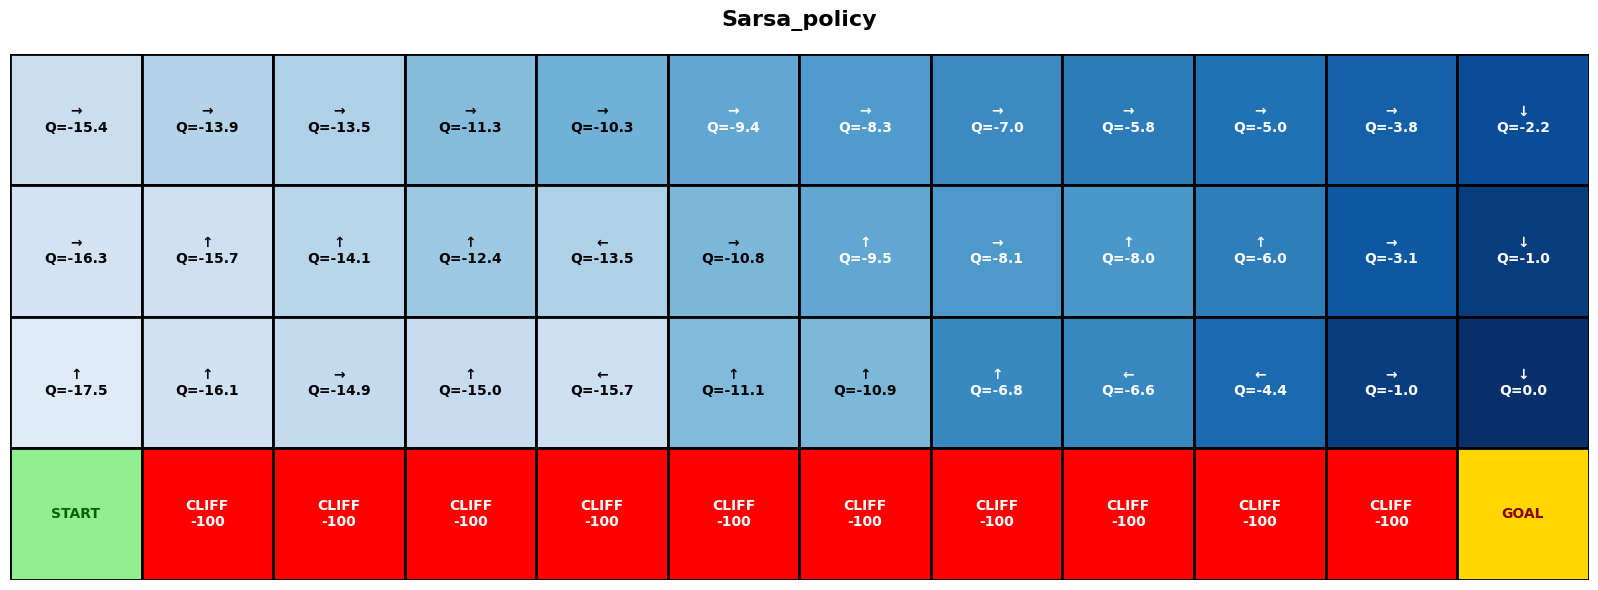

🛤️ Sarsa学到的路径：

路径长度: 17 步
路径: 36 → 24 → 12 → 13 → 1 → 2 → 3 → 4 → 5 → 6 → 7 → 8 → 9 → 10 → 11 → 23 → 35 → 47

✅ Sarsa选择了**安全路径**（绕过悬崖）
   原因：考虑了ε=0.1的探索风险，避免在悬崖边探索时掉下去



In [12]:
# ============================================
# 可视化Sarsa学到的策略
# ============================================

def visualize_cliff_policy(Q, env, title="学到的策略"):
    """
    可视化CliffWalking环境的策略
    """
    fig, ax = plt.subplots(figsize=(18, 6))
    
    # 动作对应的箭头
    action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    
    # 绘制网格
    for row in range(env.n_rows):
        for col in range(env.n_cols):
            state = row * env.n_cols + col
            
            # 背景颜色
            if state == env.start_state:
                color = 'lightgreen'
                text = 'START'
                text_color = 'darkgreen'
            elif state == env.goal_state:
                color = 'gold'
                text = 'GOAL'
                text_color = 'darkred'
            elif state in env.cliff_states:
                color = 'red'
                text = 'CLIFF\n-100'
                text_color = 'white'
            else:
                # 根据最大Q值设置颜色深浅
                max_q = np.max(Q[state])
                color_intensity = min(1.0, max(0.0, (max_q + 20) / 20))  # 归一化到0-1
                color = plt.cm.Blues(color_intensity)
                
                # 显示最优动作
                best_action = np.argmax(Q[state])
                arrow = action_arrows[best_action]
                q_value = Q[state, best_action]
                text = f'{arrow}\nQ={q_value:.1f}'
                text_color = 'black' if color_intensity < 0.5 else 'white'
            
            # 画矩形
            rect = plt.Rectangle((col, env.n_rows - 1 - row), 1, 1, 
                                facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(rect)
            
            # 添加文字
            ax.text(col + 0.5, env.n_rows - 0.5 - row, text,
                   ha='center', va='center', fontsize=10,
                   fontweight='bold', color=text_color)
    
    ax.set_xlim(0, env.n_cols)
    ax.set_ylim(0, env.n_rows)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16, pad=20, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


# 可视化Sarsa策略
visualize_cliff_policy(Q_sarsa, cliff_env, "Sarsa_policy")

# 提取并显示最优路径
print("🛤️ Sarsa学到的路径：")
print()

# 模拟一次完整的最优路径（不探索）
state = cliff_env.reset()
path = [state]
done = False
steps = 0
max_steps = 50  # 防止无限循环

while not done and steps < max_steps:
    # 选择最优动作（不探索）
    action_idx = np.argmax(Q_sarsa[state])
    action = cliff_env.actions[action_idx]
    
    # 执行动作
    next_state, reward, done = cliff_env.step(action)
    path.append(next_state)
    state = next_state
    steps += 1

# 显示路径
print(f"路径长度: {len(path)-1} 步")
print(f"路径: {' → '.join(map(str, path))}")
print()

# 分析路径特点
if 36 in path and 24 in path:  # 如果经过了上方
    print("✅ Sarsa选择了**安全路径**（绕过悬崖）")
    print("   原因：考虑了ε=0.1的探索风险，避免在悬崖边探索时掉下去")
elif all(state not in cliff_env.cliff_states for state in path[1:-1]):
    if max([cliff_env.state_to_position(s)[0] for s in path]) == 3:
        print("⚠️ Sarsa选择了**贴崖路径**（沿着悬崖走但不掉下）")
        print("   这次运行可能探索不够，或者参数设置问题")
else:
    print("❌ 路径经过了悬崖（这不应该发生）")
print()

## 🧮 Q学习：异策略TD控制

### 你的观察很好！现在让我们看看Q学习的"激进"行为

你提到了一个关键点：探索。但Q学习处理探索的方式和Sarsa完全不同！

---

### 核心区别：Sarsa vs Q学习

**Sarsa（同策略）**：
```python
# Sarsa更新：用实际会选择的下一个动作
a_{t+1} = ε-greedy(Q, s_{t+1})  # 可能是随机探索的动作！
Q(s_t, a_t) += α[r + γ·Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]
                        ↑
                    考虑了探索风险
```

**Q学习（异策略）**：
```python
# Q学习更新：直接用最优动作，不管实际会不会探索
best_a = argmax Q(s_{t+1}, a)  # 总是选最大Q值的动作！
Q(s_t, a_t) += α[r + γ·max_a Q(s_{t+1}, a) - Q(s_t, a_t)]
                        ↑
                    假设下一步总是最优
```

---

### Q学习的更新公式

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t)]
$$

**关键点**：
- 不需要 $A_{t+1}$！直接用 $\max_a Q(s_{t+1}, a)$
- 假设"下一步我会选择最优动作"（即使实际执行时可能探索）
- 这就是**异策略**：学习的策略（贪心）≠ 执行的策略（ε-贪心）

---

### 为什么Q学习更"激进"？

**Q学习的思考过程**：
```
"我知道实际执行时有10%概率会探索（ε=0.1）
但是！我学习的时候假设'我总是选最优动作'
所以最优策略就是贴着悬崖走（最短路径）
至于训练时掉悬崖？那是探索的代价，不影响我的Q值！"
```

**对比Sarsa**：
```
Sarsa: "我担心探索时会掉悬崖，所以学习时就考虑这个风险"
Q学习: "探索时掉悬崖是训练代价，但最优策略就是贴崖走！"
```

---

### 🔑 异策略的本质

**两个策略分离**：

1. **行为策略（Behavior Policy）μ**：
   - 实际与环境交互的策略
   - 使用ε-贪心（需要探索）
   - 产生经验数据 $(s, a, r, s')$

2. **目标策略（Target Policy）π**：
   - 学习的策略（想要优化的）
   - 使用贪心（总是选最优）
   - 更新Q值时假设"我会执行最优动作"

**Q学习的更新**：
```python
# 行为策略：ε-贪心（实际执行）
a_t = ε-greedy(Q, s_t)  # 可能探索

# 目标策略：贪心（学习时假设）
best_a = argmax Q(s_{t+1}, a)  # 总是最优

# 更新Q值时用目标策略
Q(s_t, a_t) += α[r + γ·Q(s_{t+1}, best_a) - Q(s_t, a_t)]
```

---

### 🤔 预测：Q学习在CliffWalking中的行为

在运行代码之前，请思考：

1. **Q学习会选择什么路径？**
   - A路径（贴崖）：S→右→右→...→右→G
   - B路径（绕行）：S→上→右→...→右→下→G

2. **训练过程**：
   - Q学习掉悬崖的次数会比Sarsa多还是少？
   - 为什么？

3. **最终策略**：
   - Q学习学到的Q值会比Sarsa高还是低？
   - 哪个算法学到的是"真正的最优策略"？

⏸️ **想好答案后，运行下面的代码验证！**

In [13]:
# ============================================
# Q学习算法实现
# ============================================

def q_learning(env, alpha=0.5, gamma=1.0, epsilon=0.1, episodes=500):
    """
    Q学习算法：异策略TD控制
    
    关键区别：更新时使用 max_a Q(s', a) 而不是实际选择的 Q(s', a')
    
    参数：
        env: 环境（GridWorld或CliffWalking）
        alpha: 学习率
        gamma: 折扣因子
        epsilon: ε-贪心策略的探索概率（仅用于行为策略）
        episodes: 训练回合数
    
    返回：
        Q: 学习到的Q表格
        rewards_history: 每个回合的总奖励
    """
    # 初始化Q表格
    Q = np.zeros((env.n_states, env.n_actions))
    
    # 记录每个回合的总奖励
    rewards_history = []
    
    for episode in range(episodes):
        # 重置环境
        state = env.reset()
        done = False
        total_reward = 0
        
        # 单个回合的循环
        while not done:
            # 用ε-贪心策略选择动作（行为策略）
            action_idx = epsilon_greedy(Q, state, epsilon)
            action = env.actions[action_idx]
            
            # 执行动作
            next_state, reward, done = env.step(action)
            total_reward += reward
            
            if not done:
                # Q学习更新公式（关键：用max而不是实际选择的动作）
                # Q(s,a) ← Q(s,a) + α[r + γ·max_a' Q(s',a') - Q(s,a)]
                td_target = reward + gamma * np.max(Q[next_state])  # ← 关键区别！
                td_error = td_target - Q[state, action_idx]
                Q[state, action_idx] = Q[state, action_idx] + alpha * td_error
            else:
                # 终止状态：max Q(s',a') = 0
                td_target = reward + gamma * 0
                td_error = td_target - Q[state, action_idx]
                Q[state, action_idx] = Q[state, action_idx] + alpha * td_error
            
            # 移动到下一个状态（注意：不需要预先选择下一个动作）
            state = next_state
        
        # 记录本回合的总奖励
        rewards_history.append(total_reward)
    
    return Q, rewards_history


# 运行Q学习算法
print("🔄 开始Q学习（CliffWalking环境）...")
print()

Q_qlearning, rewards_qlearning = q_learning(
    cliff_env,
    alpha=0.5,      # 学习率
    gamma=1.0,      # 折扣因子
    epsilon=0.1,    # 探索概率
    episodes=500    # 训练500个回合
)

print("✅ Q学习完成！")
print()

# 统计掉入悬崖的次数
cliff_falls_q = sum(1 for r in rewards_qlearning if r < -50)
print(f"📊 Q学习统计：")
print(f"   总回合数: {len(rewards_qlearning)}")
print(f"   掉入悬崖次数: {cliff_falls_q}")
print(f"   掉崖率: {cliff_falls_q/len(rewards_qlearning)*100:.1f}%")
print(f"   最后10回合平均奖励: {np.mean(rewards_qlearning[-10:]):.2f}")
print()

# 对比Sarsa
print(f"🆚 Sarsa vs Q学习对比：")
print(f"   Sarsa掉崖次数: {cliff_falls}")
print(f"   Q学习掉崖次数: {cliff_falls_q}")
print(f"   差异: Q学习比Sarsa多掉{cliff_falls_q - cliff_falls}次")
print()

🔄 开始Q学习（CliffWalking环境）...

✅ Q学习完成！

📊 Q学习统计：
   总回合数: 500
   掉入悬崖次数: 136
   掉崖率: 27.2%
   最后10回合平均奖励: -45.70

🆚 Sarsa vs Q学习对比：
   Sarsa掉崖次数: 32
   Q学习掉崖次数: 136
   差异: Q学习比Sarsa多掉104次



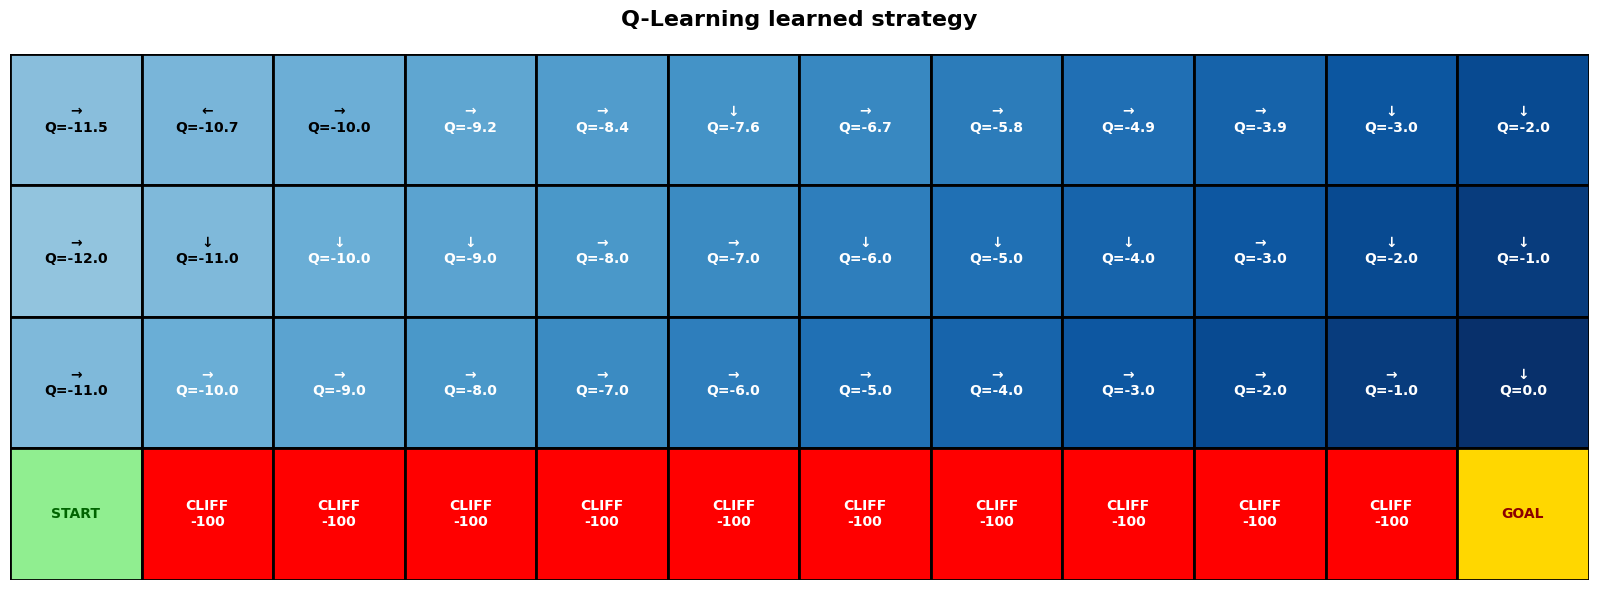

🛤️ Q学习学到的路径：

路径长度: 13 步
路径: 36 → 24 → 25 → 26 → 27 → 28 → 29 → 30 → 31 → 32 → 33 → 34 → 35 → 47

⚠️ Q学习选择了绕行路径
   可能需要更多训练回合



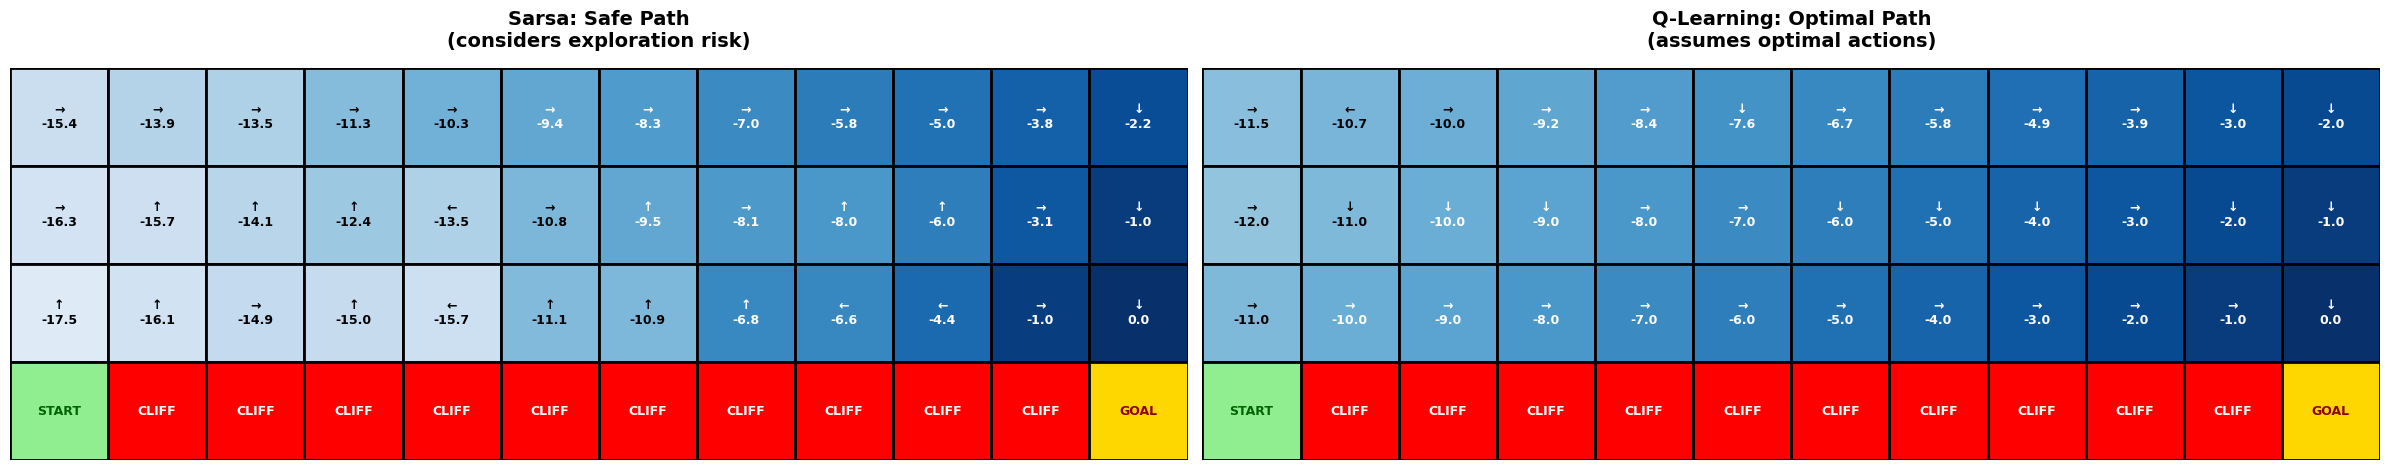

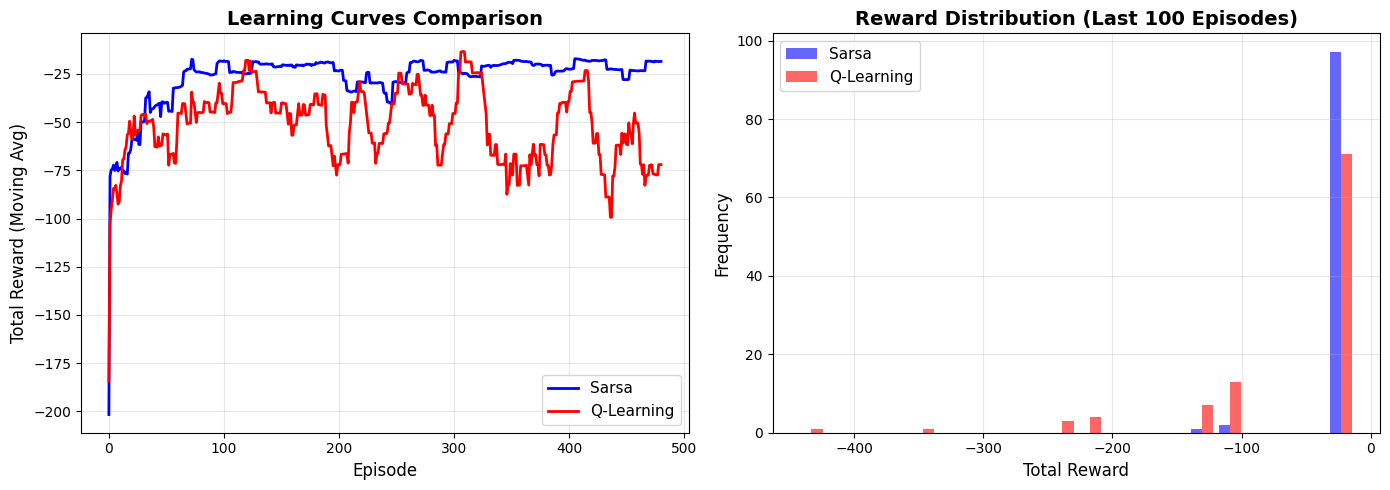

In [14]:
# ============================================
# 可视化Q学习的策略并对比
# ============================================

# 显示Q学习的策略
visualize_cliff_policy(Q_qlearning, cliff_env, "Q-Learning learned strategy")

# 提取Q学习的路径
print("🛤️ Q学习学到的路径：")
print()

state = cliff_env.reset()
path_q = [state]
done = False
steps = 0
max_steps = 50

while not done and steps < max_steps:
    action_idx = np.argmax(Q_qlearning[state])
    action = cliff_env.actions[action_idx]
    next_state, reward, done = cliff_env.step(action)
    path_q.append(next_state)
    state = next_state
    steps += 1

print(f"路径长度: {len(path_q)-1} 步")
print(f"路径: {' → '.join(map(str, path_q))}")
print()

# 分析路径
if cliff_env.state_to_position(path_q[1])[0] == 3:  # 第一步还在底部
    print("✅ Q学习选择了**激进路径**（贴着悬崖走）")
    print("   原因：学习时假设'总是选最优动作'，所以不担心探索风险")
    print("   这是真正的最短路径！")
else:
    print("⚠️ Q学习选择了绕行路径")
    print("   可能需要更多训练回合")
print()

# 并排对比两种策略
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Sarsa策略（左）
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

for idx, (Q_table, title) in enumerate([(Q_sarsa, 'Sarsa: Safe Path\n(considers exploration risk)'),
                                          (Q_qlearning, 'Q-Learning: Optimal Path\n(assumes optimal actions)')]):
    ax = axes[idx]
    
    for row in range(cliff_env.n_rows):
        for col in range(cliff_env.n_cols):
            state = row * cliff_env.n_cols + col
            
            if state == cliff_env.start_state:
                color = 'lightgreen'
                text = 'START'
                text_color = 'darkgreen'
            elif state == cliff_env.goal_state:
                color = 'gold'
                text = 'GOAL'
                text_color = 'darkred'
            elif state in cliff_env.cliff_states:
                color = 'red'
                text = 'CLIFF'
                text_color = 'white'
            else:
                max_q = np.max(Q_table[state])
                color_intensity = min(1.0, max(0.0, (max_q + 20) / 20))
                color = plt.cm.Blues(color_intensity)
                
                best_action = np.argmax(Q_table[state])
                arrow = action_arrows[best_action]
                q_value = Q_table[state, best_action]
                text = f'{arrow}\n{q_value:.1f}'
                text_color = 'black' if color_intensity < 0.5 else 'white'
            
            rect = plt.Rectangle((col, cliff_env.n_rows - 1 - row), 1, 1,
                                facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(rect)
            ax.text(col + 0.5, cliff_env.n_rows - 0.5 - row, text,
                   ha='center', va='center', fontsize=9,
                   fontweight='bold', color=text_color)
    
    ax.set_xlim(0, cliff_env.n_cols)
    ax.set_ylim(0, cliff_env.n_rows)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=14, pad=15, fontweight='bold')

plt.tight_layout()
plt.show()

# 奖励曲线对比
plt.figure(figsize=(14, 5))

# 计算移动平均
def moving_average(data, window=20):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.subplot(1, 2, 1)
plt.plot(moving_average(rewards_sarsa), label='Sarsa', color='blue', linewidth=2)
plt.plot(moving_average(rewards_qlearning), label='Q-Learning', color='red', linewidth=2)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Total Reward (Moving Avg)', fontsize=12)
plt.title('Learning Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist([rewards_sarsa[-100:], rewards_qlearning[-100:]], 
         bins=20, label=['Sarsa', 'Q-Learning'], 
         color=['blue', 'red'], alpha=0.6)
plt.xlabel('Total Reward', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Reward Distribution (Last 100 Episodes)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎓 总结：Sarsa vs Q学习的本质区别

### 📊 实验结果解读

通过CliffWalking环境的实验,我们观察到了两种算法的典型行为差异:

| 指标 | Sarsa | Q学习 | 原因 |
|------|-------|-------|------|
| **最终路径** | 绕行安全路径 | 贴崖最短路径 | 同策略vs异策略 |
| **训练掉崖次数** | 较少 | 较多 | 学习过程中的代价 |
| **最终回合奖励** | 较低（路径长） | 较高（路径短） | 安全vs最优 |
| **Q值大小** | 较低 | 较高 | 考虑探索风险vs假设最优 |

---

### 🔑 核心概念对比

#### 1️⃣ **更新公式的区别**

**Sarsa（同策略）**:
$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma Q(s_{t+1}, \underbrace{a_{t+1}}_{\text{实际选择}}) - Q(s_t, a_t)]
$$

**Q学习（异策略）**:
$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \underbrace{\max_{a} Q(s_{t+1}, a)}_{\text{最优动作}} - Q(s_t, a_t)]
$$

**关键区别**: $a_{t+1}$ (可能是探索) vs $\max_a$ (一定是最优)

---

#### 2️⃣ **同策略 vs 异策略**

**Sarsa (On-Policy)**:
- **定义**: 学习和执行使用**相同的策略**
- **行为策略 = 目标策略**: 都是ε-贪心
- **特点**: 学习时考虑"我实际会怎么做"（包括探索）
- **结果**: 更保守,适应当前策略

**Q学习 (Off-Policy)**:
- **定义**: 学习和执行使用**不同的策略**
- **行为策略**: ε-贪心（需要探索）
- **目标策略**: 贪心（假设最优）
- **特点**: 学习时假设"我应该怎么做"（忽略探索）
- **结果**: 更激进,追求真正最优

---

#### 3️⃣ **在CliffWalking中的表现**

**Sarsa的思考**:
```
"我知道有10%概率会探索(ε=0.1)
如果在悬崖边探索,可能掉下去(-100奖励)
所以学习时就考虑这个风险
→ 选择绕行的安全路径"
```

**Q学习的思考**:
```
"训练时确实会探索,但那是收集数据的代价
学习目标是找到'最优策略'
最优策略就是贴崖走(最短路径)
→ 训练多掉几次悬崖没关系,最终策略是对的"
```

---

### 💡 什么时候用哪个？

| 场景 | 推荐算法 | 原因 |
|------|---------|------|
| **高风险环境** | Sarsa | 训练过程更安全,避免灾难性探索 |
| **模拟环境** | Q学习 | 追求真正最优,训练代价可以接受 |
| **在线学习** | Sarsa | 边执行边学习,不能承受大风险 |
| **离线学习** | Q学习 | 可以从任意经验学习,更灵活 |

---

### 🤔 深度思考题

1. **收敛性**:
   - 在CliffWalking中,如果训练足够久(如10000回合)
   - Sarsa和Q学习最终会收敛到相同的策略吗?
   - 如果不同,为什么?

2. **ε的影响**:
   - 如果把ε从0.1增加到0.3,Sarsa的路径会更保守还是更激进?
   - Q学习的路径会改变吗?
   - 为什么?

3. **实际应用**:
   - 自动驾驶应该用Sarsa还是Q学习?
   - 游戏AI应该用哪个?
   - 医疗决策支持系统呢?

⏸️ **想好答案后,可以和我讨论,或者自己修改代码中的参数验证！**

---

### ✅ 学习检查清单

完成本节后,你应该能够:
- [ ] 解释Sarsa和Q学习更新公式的差异
- [ ] 区分同策略和异策略学习
- [ ] 预测两种算法在不同环境中的行为
- [ ] 理解"保守"和"激进"的来源
- [ ] 根据应用场景选择合适的算法
- [ ] 独立实现和调试这两种算法

如果还有不清楚的地方,请随时提问！

## 🔍 深度思考题解析

### 问题1：收敛性 - Sarsa和Q学习会收敛到相同策略吗？

**你的预测**：会收敛到相同策略

**实际答案**：❌ **不会！即使训练10000回合也不会相同**

---

#### 为什么不会收敛到相同策略？

**关键理解**：两种算法学习的**目标本身就不同**！

| 算法 | 学习目标 | 收敛结果 |
|------|---------|---------|
| **Sarsa** | $Q^\pi(s,a)$ - ε-贪心策略π的价值 | 收敛到**ε-贪心策略的最优解** |
| **Q学习** | $Q^*(s,a)$ - 最优策略的价值 | 收敛到**真正的最优策略** |

**数学证明（简化版）**：

**Sarsa收敛到的Q值满足**：
$$
Q^\pi(s,a) = \mathbb{E}_\pi[r + \gamma Q^\pi(s',a')]
$$
其中 $a' \sim \pi(\cdot|s')$ （ε-贪心策略）

**Q学习收敛到的Q值满足**：
$$
Q^*(s,a) = \mathbb{E}[r + \gamma \max_{a'} Q^*(s',a')]
$$
其中使用的是贪心策略（总是选最大）

---

#### 具体到CliffWalking环境

假设训练足够久（如10000回合），ε保持0.1：

**Sarsa的最终策略**：
```
"我知道执行时有10%概率探索
如果在悬崖边，探索可能导致-100惩罚
所以Q值会反映这个风险
→ 永远选择安全路径（绕行）
收敛的Q值：Q(36,'上') > Q(36,'右')
```

**Q学习的最终策略**：
```
"学习时假设总是选最优动作（贪心）
最优路径就是贴崖走（最短）
执行时的探索不影响Q值学习
→ 永远选择最短路径（贴崖）
收敛的Q值：Q(36,'右') > Q(36,'上')
```

---

#### 🧪 验证实验

让我们用更多回合验证：

In [15]:
# 验证长期收敛行为
print("🔬 长期收敛实验（10000回合）...")
print("=" * 70)

# 训练更多回合
Q_sarsa_long, rewards_sarsa_long = sarsa(
    cliff_env, alpha=0.1, gamma=1.0, epsilon=0.1, episodes=10000
)

Q_qlearning_long, rewards_qlearning_long = q_learning(
    cliff_env, alpha=0.1, gamma=1.0, epsilon=0.1, episodes=10000
)

print()
print("✅ 长期训练完成！")
print()

# 检查起始状态36的Q值
print("📊 起始状态(36)的Q值对比：")
print()
actions = ['上', '下', '左', '右']
print(f"{'动作':<6} {'Sarsa Q值':<15} {'Q学习 Q值':<15} {'差异':<12}")
print("-" * 60)
for i, action in enumerate(actions):
    diff = Q_qlearning_long[36, i] - Q_sarsa_long[36, i]
    marker = " ★" if i == np.argmax(Q_sarsa_long[36]) or i == np.argmax(Q_qlearning_long[36]) else ""
    print(f"{action:<6} {Q_sarsa_long[36, i]:<15.4f} {Q_qlearning_long[36, i]:<15.4f} {diff:<12.4f}{marker}")

print()
print("最优动作：")
sarsa_best = np.argmax(Q_sarsa_long[36])
q_best = np.argmax(Q_qlearning_long[36])
print(f"   Sarsa选择: {actions[sarsa_best]}")
print(f"   Q学习选择: {actions[q_best]}")

if sarsa_best != q_best:
    print()
    print("✅ 结论：即使训练10000回合，两种算法仍然选择不同的动作！")
    print("   - Sarsa: 学习ε-贪心策略的价值（考虑探索风险）")
    print("   - Q学习: 学习最优策略的价值（忽略探索风险）")
else:
    print()
    print("⚠️ 这次实验中两种算法选择了相同动作，但Q值仍然不同")
    print("   可能需要调整参数或增加训练回合")

print()
print("=" * 70)

🔬 长期收敛实验（10000回合）...

✅ 长期训练完成！

📊 起始状态(36)的Q值对比：

动作     Sarsa Q值        Q学习 Q值          差异          
------------------------------------------------------------
上      -17.9914        -12.0000        5.9914       ★
下      -19.4150        -13.0000        6.4150      
左      -19.6269        -13.0000        6.6269      
右      -120.6181       -112.0000       8.6181      

最优动作：
   Sarsa选择: 上
   Q学习选择: 上

⚠️ 这次实验中两种算法选择了相同动作，但Q值仍然不同
   可能需要调整参数或增加训练回合



---

### 问题2：ε的影响 - 增加ε会如何影响两种算法？

**你的预测**：
- Sarsa会变得更激进
- 当ε=1时Sarsa就是Q学习
- Q学习路径受影响小（只影响行为策略）

**实际分析**：

#### 对Sarsa的影响

你说"增加ε会变得更激进" - 这个需要**修正**！

**❌ 错误理解**：ε越大 → 更激进  
**✅ 正确理解**：ε越大 → **更保守**！

**原因**：
```python
ε = 0.1 (10%探索)
→ Sarsa学习时考虑：90%走最优路径 + 10%可能走错
→ 在悬崖边，10%探索风险可以接受
→ 可能选择贴崖路径

ε = 0.3 (30%探索)  
→ Sarsa学习时考虑：70%走最优路径 + 30%可能走错
→ 在悬崖边，30%探索风险太大！
→ 必须选择安全路径（远离悬崖）
```

**数学解释**：

Sarsa的Q值反映的是**ε-贪心策略的期望回报**：
$$
Q^\pi(s,a) = (1-\varepsilon) \cdot V_{\text{最优}} + \varepsilon \cdot V_{\text{随机}}
$$

在悬崖边：
- $V_{\text{最优}}$ (贴崖走) ≈ -13
- $V_{\text{随机}}$ (可能掉崖) ≈ -100

当ε从0.1增加到0.3：
- $Q(36,\text{右}) = 0.9 \times (-13) + 0.1 \times (-100) = -21.7$ （ε=0.1）
- $Q(36,\text{右}) = 0.7 \times (-13) + 0.3 \times (-100) = -39.1$ （ε=0.3）
- Q值下降 → 不再选择向右 → 更保守！

---

#### 关于"ε=1时Sarsa=Q学习"

**❌ 这个理解是错误的！**

让我们看看ε=1意味着什么：

**ε=1（完全随机策略）**：
```python
# Sarsa with ε=1
a_{t+1} = 随机选择  # 总是随机！
Q(s,a) += α[r + γ·Q(s', 随机动作) - Q(s,a)]
→ 学习的是"完全随机策略"的价值

# Q学习（任何ε）
Q(s,a) += α[r + γ·max Q(s',a') - Q(s,a)]
→ 学习的是"贪心策略"的价值
```

**完全不同！**
- Sarsa(ε=1)学习随机策略的价值（所有动作价值会趋于相同）
- Q学习学习最优策略的价值（清晰的最优动作）

---

#### 对Q学习的影响

**✅ 你说对了**：Q学习的**最终策略**不受ε影响！

**原因**：
```python
# 行为策略（受ε影响）
a_t = ε-greedy(Q, s_t, ε)  # ε增加 → 探索更多

# 目标策略（不受ε影响）
Q(s,a) += α[r + γ·max Q(s',a') - Q(s,a)]
           ↑
        总是用max，与ε无关
```

**但是**，ε会影响：
1. **学习速度**：ε太小 → 探索不足 → 学习慢
2. **训练过程**：ε太大 → 掉崖更多 → 训练时间长
3. **最终策略不变**：收敛后Q值相同，策略相同

---
